# Workshop Exercises: Analyzing and Visualizing Open Air Quality Data

## Import the airqdata analysis toolkit

In [8]:
%run ../airqdata-master/airqdata
pd.set_option("display.max_rows", 10)

In [3]:
%matplotlib inline

## Get metadata on air quality measurements from IRCELINE

In [4]:
irceline.Metadata()

## Find out which IRCELINE station that measures black carbon is closest to your home

In [5]:
#Charlotte
irceline.Metadata.search_proximity(lat=50.81, lon=4.4, radius=5)

,label,lat,lon,distance
id,,,,
1119,41R002 - Ixelles,50.83,4.38,2.00
1122,41R012 - UCCLE,50.80,4.36,3.27
1112,41B006 - Bruxelles (Parlement UE),50.84,4.37,3.66
1711,41B008 - Brussel (Beliardstraat),50.84,4.38,3.81
1109,41B001 - Arts-Loi,50.85,4.37,4.54


## Identify PM sensors from the Luftdaten/InfluencAir projects that are close to your home

In [6]:
influencair.Metadata(refresh_cache=True)

In [9]:
#Charlotte
luftdaten.search_proximity(lat=50.81, lon=4.4, radius=10)

,sensor_type,latitude,longitude,distance
sensor_id,,,,
5830,DHT22,50.83,4.39,2.30
5829,SDS011,50.83,4.39,2.30
9499,DHT22,50.83,4.38,2.79
9498,SDS011,50.83,4.38,2.79
2391,DHT22,50.82,4.36,3.16
...,...,...,...,...
3446,DHT22,50.87,4.38,7.08
3445,SDS011,50.87,4.38,7.08
3807,SDS011,50.86,4.32,8.19


## Select one of those sensors and set up a Sensor object for it

In [15]:
sensor_id = "5829"
sensor_exercice = influencair.Sensor(sensor_id,refresh_cache = True)

## Check the current measurements of this sensor. What do you think of the PM levels?

In [16]:
sensor_exercice.current_measurements

{'pm10': 75.57, 'pm2.5': 42.37}

## Download the measurement data of the past 3 days for this sensor and visualize them. Are the PM  levels acceptable? For how much of the time? Can you see any pollution patterns across time?

In [19]:
sensor_exercice.get_measurements(start_date="2018-02-28", end_date="2018-03-02")

Using cached luftdaten.info data for sensor 5829 on 2018-02-28
Using cached luftdaten.info data for sensor 5829 on 2018-03-01
Using cached luftdaten.info data for sensor 5829 on 2018-03-02


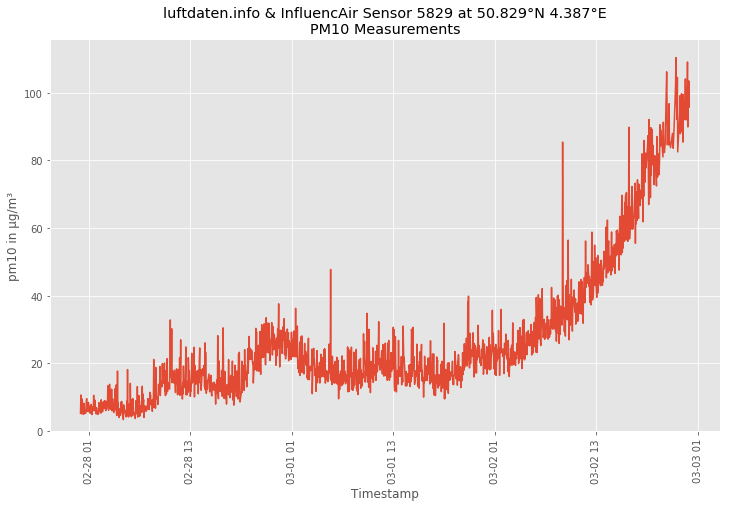

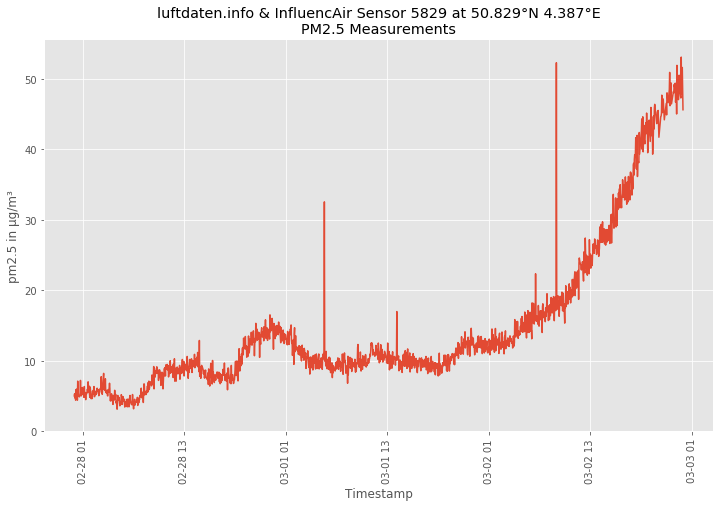

([<matplotlib.figure.Figure at 0x1132d9748>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1133ae438>])

In [21]:
sensor_exercice.plot_measurements()

In [23]:
describe(sensor_exercice.measurements)

,pm10,pm2.5
count,1676.00,1676.00
mean,26.44,14.30
std,20.37,10.11
min,3.42,3.12
1%,4.62,3.85
50%,20.21,10.80
99%,96.88,48.09
max,110.40,53.07


## Compare these data to those of a different sensor a few kilometers away. How similar are they? Do you see shifts between them?

In [27]:
sensor_other = influencair.Sensor("3445",refresh_cache = True)

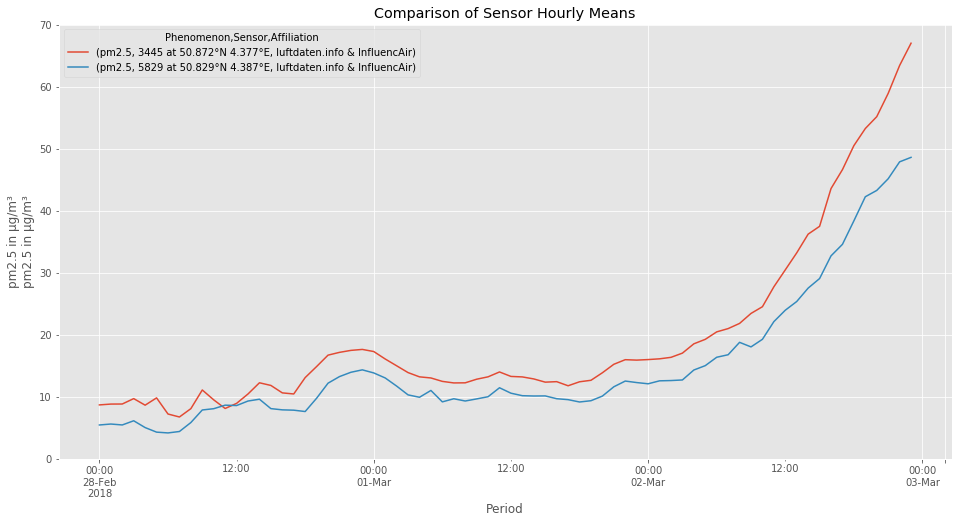

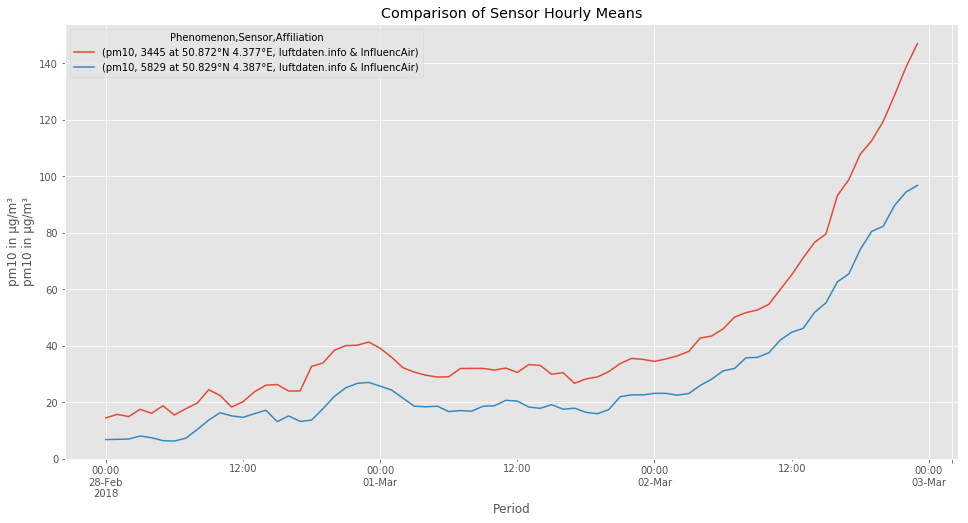

In [33]:
combined_data_25, plot_25 = compare_sensor_data(sensors=[sensor_other,sensor_exercice],
                                          phenomena=["pm2.5","pm2.5"],
                                          start_date="2018-02-28", end_date="2018-03-02",
                                          hourly_means=True,
                                          quiet=True)
combined_data_10, plot_10 = compare_sensor_data(sensors=[sensor_other,sensor_exercice],
                                          phenomena=["pm10","pm10"],
                                          start_date="2018-02-28", end_date="2018-03-02",
                                          hourly_means=True,
                                          quiet=True)